In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_fichero_vuelos = "/content/drive/MyDrive/Colab Notebooks/flights.csv"
dataset_vuelos = open(ruta_fichero_vuelos, "r")

In [ ]:
import pandas as pd
dataset_vuelos=pd.read_csv(ruta_fichero_vuelos)
#Los tres primero pasos nos han servido para leer el dataset.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset_vuelos.columns
#Nos fijamos en las variables que nos servirán para hacer el modelo.

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

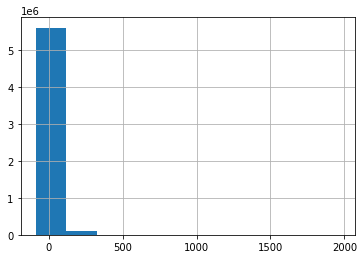

In [ ]:
dataset_vuelos["ARRIVAL_DELAY"].hist()
dataset_vuelos['ARRIVAL_DELAY'].describe()
#Esto lo hemos hecho para ver en que valores se mueve la variable de "ARRIVAL_DELAY". Vemos como existe un outlier de 1971 min de retrasos que distorsiona el histograma.

count    2.050522e+06
mean     2.840547e+01
std      3.532075e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.600000e+01
max      1.990000e+02
Name: ARRIVAL_DELAY, dtype: float64

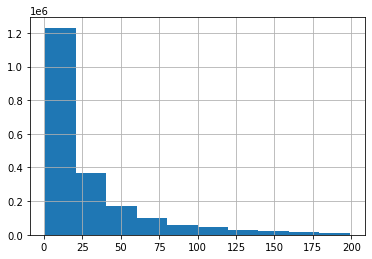

In [ ]:
dataset_vuelos[(dataset_vuelos["ARRIVAL_DELAY"] > 0) & (dataset_vuelos["ARRIVAL_DELAY"] < 200)] ["ARRIVAL_DELAY"].hist()
dataset_vuelos[(dataset_vuelos["ARRIVAL_DELAY"] > 0) & (dataset_vuelos["ARRIVAL_DELAY"] < 200)] ["ARRIVAL_DELAY"].describe()

In [ ]:
dataset_vuelos["RETRASO"] = dataset_vuelos.ARRIVAL_DELAY > 15
dataset_vuelos.RETRASO

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Name: RETRASO, Length: 5819079, dtype: bool

In [ ]:
vuelos_no_cancelados = dataset_vuelos[(dataset_vuelos.CANCELLED == 0) & (dataset_vuelos.DIVERTED == 0)].sample(frac=0.02).copy()
vuelos_no_cancelados["SCHEDULED_DEPARTURE"] = vuelos_no_cancelados["SCHEDULED_DEPARTURE"].apply(lambda x: int('{0:0>4}'.format(x)[0:2]))
vuelos_no_cancelados["SCHEDULED_ARRIVAL"] = vuelos_no_cancelados["SCHEDULED_ARRIVAL"].apply(lambda x: int('{0:0>4}'.format(x)[0:2]))
vuelo_retraso_x = vuelos_no_cancelados[["MONTH", "DAY", "DAY_OF_WEEK", "AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "SCHEDULED_TIME", "SCHEDULED_ARRIVAL"]]
retraso_x_dummies = pd.get_dummies(data = vuelo_retraso_x , columns = ["MONTH", "DAY_OF_WEEK", "AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(retraso_x_dummies, vuelos_no_cancelados.RETRASO, test_size = 0.25, random_state = 123)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=50)
modelRetraso = dtc.fit(train_x, train_y)
dtc.score(test_x, test_y)

0.7652432621631081

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, dtc.predict(test_x))

array([[20843,  2676],
       [ 4031,  1020]])

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits = 10)

In [ ]:
from sklearn.model_selection import train_test_split
for depth in range(1, 20):
    model_kfold = DecisionTreeClassifier(max_depth=depth)
    results_kfold = model_selection.cross_val_score(model_kfold, retraso_x_dummies, vuelos_no_cancelados.RETRASO, cv = kfold)
    print('Profundidad: ' + str(depth) + " - " + str(results_kfold.mean()))

Profundidad: 1 - 0.8207385369268463
Profundidad: 2 - 0.8207385369268463
Profundidad: 3 - 0.8207385369268463
Profundidad: 4 - 0.8207297864893246
Profundidad: 5 - 0.8206685334266715
Profundidad: 6 - 0.8203447672383619
Profundidad: 7 - 0.8196884844242212
Profundidad: 8 - 0.8192947147357368
Profundidad: 9 - 0.8187259362968149
Profundidad: 10 - 0.817728386419321
Profundidad: 11 - 0.8167308365418272
Profundidad: 12 - 0.8161008050402521
Profundidad: 13 - 0.8145869793489675
Profundidad: 14 - 0.8132569128456423
Profundidad: 15 - 0.8117780889044452
Profundidad: 16 - 0.8100192509625481
Profundidad: 17 - 0.808129156457823
Profundidad: 18 - 0.8065890794539726
Profundidad: 19 - 0.8049964998249912


In [ ]:
results_kfold

array([0.80232762, 0.80556528, 0.80110256, 0.81291565, 0.80311516,
       0.80145257, 0.80469023, 0.80714036, 0.8060028 , 0.80565278])

In [ ]:
results_kfold.mean()

0.8049964998249912

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(retraso_x_dummies, vuelos_no_cancelados.RETRASO, test_size = 0.25, random_state = 123)
from sklearn.tree import DecisionTreeClassifier
for depth in [2, 3, 4, 5, 6, 10, 20, 30]:
  dtc = DecisionTreeClassifier(max_depth=depth)
  modelRetraso = dtc.fit(train_x, train_y)
  print(dtc.score(test_x, test_y))




0.8232061603080154
0.8232061603080154
0.8232061603080154
0.8231011550577529
0.8228561428071404
0.8200210010500525
0.807770388519426
0.7899194959747987


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_x, test_x, train_y, test_y = train_test_split(retraso_x_dummies, vuelos_no_cancelados.RETRASO, test_size = 0.25, random_state = 123)
from sklearn.tree import DecisionTreeClassifier
tree_para = {"max_depth": [2, 3, 4, 5, 10, 20, 30]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv = 5, n_jobs = 4)
clf.fit(train_x, train_y)
clf


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 20, 30]})

In [ ]:
clf.best_score_

0.8199159957997899